Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Epoch 1/10
7/7 [==============================] - 8s 999ms/step - loss: 0.7845 - accuracy: 0.5396 - val_loss: 0.6268 - val_accuracy: 0.6863
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 0.6163 - accuracy: 0.6634 - val_loss: 0.5630 - val_accuracy: 0.6863
Epoch 3/10
7/7 [==============================] - 7s 950ms/step - loss: 0.5425 - accuracy: 0.7426 - val_loss: 0.5257 - val_accuracy: 0.8039
Epoch 4/10
7/7 [==============================] - 8s 1s/step - loss: 0.4887 - accuracy: 0.7624 - val_loss: 0.5149 - val_accuracy: 0.8431
Epoch 5/10
7/7 [==============================] - 7s 960ms/step - loss: 0.4403 - accuracy: 0.8069 - val_loss: 0.5584 - val_accuracy: 0.8235
Epoch 6/10
7/7 [==============================] - 8s 1s/step - loss: 0.3948 - accuracy: 0.8465 - val_loss: 0.5944 - val_accuracy: 0.8627
Epoch 7/10
7/7 [======================

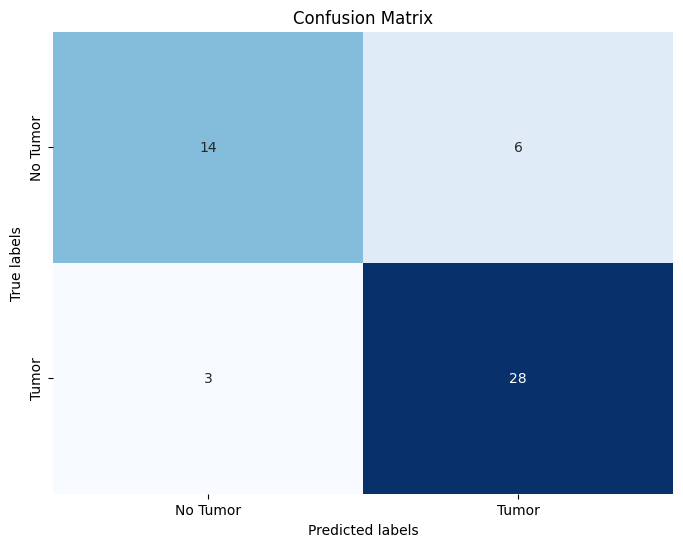

8/8 [==============================] - 2s 274ms/step
Images with Tumor: ['no 95.jpg', '20 no.jpg', '5 no.jpg', '33 no.jpg', 'no 92.jpg', '31 no.jpg', '44no.jpg', 'Y113.JPG', 'Y102.jpg', 'Y166.JPG', 'Y103.jpg', 'Y114.JPG', 'Y16.JPG', 'Y170.JPG', 'Y165.JPG', 'Y117.JPG', 'Y17.jpg', 'Y154.jpg', 'Y2.jpg', 'Y181.jpg', 'Y167.JPG', 'Y111.JPG', 'Y188.jpg', 'Y160.JPG', 'Y156.JPG', 'Y168.jpg', 'Y20.jpg', 'Y157.JPG', 'Y159.JPG', 'Y10.jpg', 'Y194.jpg', 'Y164.JPG', 'Y185.jpg', 'Y180.jpg', 'Y19.JPG', 'Y21.jpg', 'Y192.JPG', 'Y104.jpg', 'Y183.jpg', 'Y106.jpg', 'Y107.jpg', 'Y1.jpg', 'Y108.jpg', 'Y146.JPG', 'Y147.JPG', 'Y15.jpg', 'Y112.JPG', 'Y184.JPG', 'Y169.jpg', 'Y153.jpg', 'Y109.JPG', 'Y186.jpg', 'Y101.jpg', 'Y12.jpg', 'Y22.jpg', 'Y23.JPG', 'Y163.JPG', 'Y13.jpg', 'Y182.JPG', 'Y193.JPG', 'Y100.JPG', 'Y158.JPG', 'Y116.JPG', 'Y105.jpg', 'Y115.JPG', 'Y148.JPG', 'Y195.JPG', 'Y155.JPG', 'Y18.JPG', 'Y161.JPG', 'Y11.jpg', 'Y14.jpg', 'Y120.JPG', 'Y162.jpg', 'Y24.jpg', 'Y35.jpg', 'Y53.jpg', 'Y74.jpg', 'Y25.jpg

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Function to print all images in a folder
def print_images(folder):
    for filename in os.listdir(folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check if the file is an image
            img_path = os.path.join(folder, filename)
            img = mpimg.imread(img_path)
            plt.imshow(img)
            plt.title(filename)  # Use filename as the title
            plt.axis('off')  # Turn off axis
            plt.show()

# Function to load and preprocess images from the directory
def load_images_and_labels(folder_paths):
    images = []
    labels = []
    filenames = []
    for i, folder_path in enumerate(folder_paths):
        for filename in os.listdir(folder_path):
            img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (150, 150))  # Resize image to ensure uniform dimensions
                images.append(img)
                labels.append(i)  # Assign label based on folder index (0 for no, 1 for yes)
                filenames.append(filename)  # Store filename
    return images, labels, filenames

# Load images, labels, and filenames
yes_folder = '/content/gdrive/MyDrive/yes'  # Folder containing images of people with brain tumor
no_folder = '/content/gdrive/MyDrive/no'    # Folder containing images of people without brain tumor
images, labels, filenames = load_images_and_labels([no_folder, yes_folder])

# Preprocess images and labels
X = np.array(images) / 255.0  # Normalize pixel values
y = to_categorical(labels)  # Convert labels to one-hot encoding

# Split data into training and testing sets
X_train, X_test, y_train, y_test, filenames_train, filenames_test = train_test_split(X, y, filenames, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))  # Adjust input shape according to image dimensions
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 units (yes or no)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Get predictions on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Predict on all images
predictions = model.predict(X)

# Classify images based on predictions
tumor_images = []
non_tumor_images = []
for i, pred in enumerate(predictions):
    if np.argmax(pred) == 1:
        tumor_images.append(filenames[i])
    else:
        non_tumor_images.append(filenames[i])

print("Images with Tumor:", tumor_images)
print("Images without Tumor:", non_tumor_images)


In [ ]:
# import os
# import matplotlib.pyplot as plt
# import numpy as np
# import cv2
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.utils import to_categorical
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# from google.colab import drive
# from IPython.display import HTML

# # Mount Google Drive
# drive.mount('/content/gdrive')

# # Function to load and preprocess images from the directory
# def load_images_and_labels(folder_paths):
#     images = []
#     labels = []
#     for i, folder_path in enumerate(folder_paths):
#         for filename in os.listdir(folder_path):
#             img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)
#             if img is not None:
#                 img = cv2.resize(img, (150, 150))  # Resize image to ensure uniform dimensions
#                 images.append(img)
#                 labels.append(i)  # Assign label based on folder index (0 for no, 1 for yes)
#     return images, labels

# # Load images, labels
# yes_folder = '/content/gdrive/MyDrive/yes'  # Folder containing images of people with brain tumor
# no_folder = '/content/gdrive/MyDrive/no'    # Folder containing images of people without brain tumor
# images, labels = load_images_and_labels([no_folder, yes_folder])

# # Preprocess images and labels
# X = np.array(images) / 255.0  # Normalize pixel values
# y = to_categorical(labels)  # Convert labels to one-hot encoding

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the model
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))  # Adjust input shape according to image dimensions
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(2, activation='softmax'))  # Output layer with 2 units (yes or no)

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)

# # Get predictions on test set
# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_true_classes = np.argmax(y_test, axis=1)

# # Compute confusion matrix
# conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
#             xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()

# # Save confusion matrix plot as an image
# conf_matrix_img_path = '/content/confusion_matrix.png'
# plt.savefig(conf_matrix_img_path)

# # Convert confusion matrix image to HTML tag
# conf_matrix_html = f'<img src="{conf_matrix_img_path}" alt="Confusion Matrix">'

# # Display test loss, test accuracy, and confusion matrix in HTML format
# html_content = f"""
# <!DOCTYPE html>
# <html>
# <head>
#     <title>Evaluation Metrics</title>
# </head>
# <body>
#     <h2>Evaluation Metrics</h2>
#     <p>Test Loss: {loss}</p>
#     <p>Test Accuracy: {accuracy}</p>
#     <h3>Confusion Matrix</h3>
#     {conf_matrix_html}
# </body>
# </html>
# """

# # Display HTML content
# HTML(html_content)
